In [571]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [572]:
df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [573]:
df.shape

(39717, 111)

#### Removing columns where all rows are NA

In [574]:
df = df.drop(axis=1, columns = df.columns[df.isna().all()].tolist())

In [575]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

In [576]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 57 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

### Data Cleaning

#### Fixing columns where entry count is not 39717

In [577]:
df['emp_length'] = df['emp_length'].fillna(0)
df['emp_title'] = df['emp_title'].fillna('Unknown')


#### Dropping unnecessary columns

In [578]:
# dropping desc, tax_liens (all values are 0),id,
# next_pymnt_d - only 1140 values are present
# chargeoff_within_12_mths - all values are 0
# pymnt_plan - all values are n
# out_prncp - most values are 0
# out_prncp_inv - most values are 0
# pub_rec_bankruptcies - most values are 0
# acc_now_delinq - all values are 0
# delinq_amnt - all values are 0
# initial_list_status - all values are f
# policy_code - all values are 1
# collections_12_mths_ex_med - all values are 0
df = df.drop(labels=['desc', 'tax_liens', 'id', 'url', 'title', 'zip_code', 'mths_since_last_delinq',
                     'mths_since_last_record','next_pymnt_d', 'chargeoff_within_12_mths', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 
                     'pub_rec_bankruptcies', 'acc_now_delinq', 'delinq_amnt', 'initial_list_status', 'policy_code', 'collections_12_mths_ex_med'], axis=1)   


#### Dropping redundant rows

In [579]:
# last_credit_pull_d - has 2 missing values - so deleting the rows
# revol_util - has 50 missing values - so deleting the rows
df = df[df['last_credit_pull_d'].notna()]
df = df[df['revol_util'].notna()]

In [580]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39665 entries, 0 to 39716
Data columns (total 38 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   member_id                39665 non-null  int64  
 1   loan_amnt                39665 non-null  int64  
 2   funded_amnt              39665 non-null  int64  
 3   funded_amnt_inv          39665 non-null  float64
 4   term                     39665 non-null  object 
 5   int_rate                 39665 non-null  object 
 6   installment              39665 non-null  float64
 7   grade                    39665 non-null  object 
 8   sub_grade                39665 non-null  object 
 9   emp_title                39665 non-null  object 
 10  emp_length               39665 non-null  object 
 11  home_ownership           39665 non-null  object 
 12  annual_inc               39665 non-null  float64
 13  verification_status      39665 non-null  object 
 14  issue_d                  39

#### Looking into object dtypes which should be numeric or float

In [581]:
# term can be converted to int
df['term'] = df['term'].apply(lambda x: int(x.split()[0]))

In [582]:
# int_rate can be converted to float
df['int_rate'] = df['int_rate'].apply(lambda x: float(x.split('%')[0]))

In [583]:
# revol_util can be converted to float
df['revol_util'] = df['revol_util'].apply(lambda x: float(x.split('%')[0]))


In [584]:
df.to_csv('cleaned_loan.csv', index=False)

#### Distribute based on defaulters, non-defaulters and current

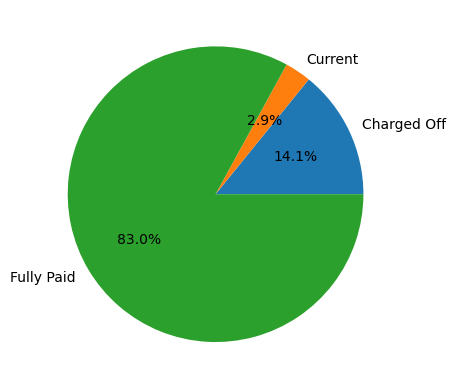

In [585]:
grouped_loadstatus = df.groupby('loan_status')['member_id'].count()
plt.pie(grouped_loadstatus, labels=grouped_loadstatus.index, autopct='%1.1f%%')
plt.show()

#### Getting rid of 2.9% of people who are currently paying off the loan

In [586]:
df = df[df['loan_status'] != 'Current']

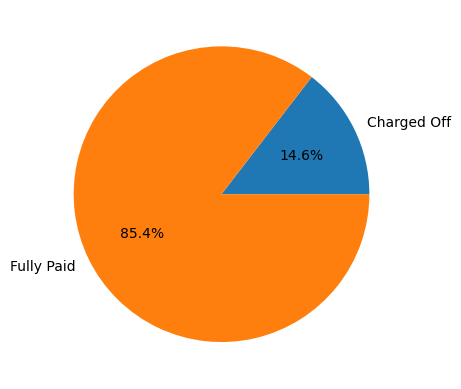

In [587]:
plt.pie(df.groupby('loan_status')['member_id'].count(), labels=df.groupby('loan_status')['member_id'].count().index, autopct='%1.1f%%')
plt.show()

14.6% of total people have defaulted,

we need to find out what defaulters have or do different than the people who fully pay their loan

In [588]:
defaulters = df[df['loan_status'] == 'Charged Off']
non_defaulters = df[df['loan_status'] == 'Fully Paid']

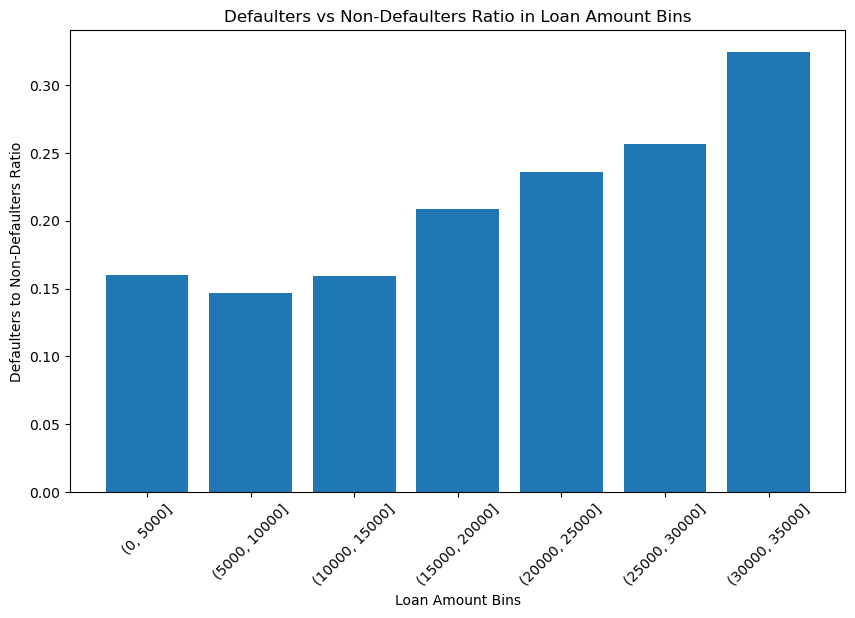

In [589]:
# Based on the loan amount

# Create bins for loan amounts
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000, 45000, 50000]

# Group defaulters and non-defaulters by loan amount bins
defaulters_bins = defaulters.groupby(pd.cut(defaulters['loan_amnt'], bins)).size()
fullypaid_bins = non_defaulters.groupby(pd.cut(non_defaulters['loan_amnt'], bins)).size()

# Calculate the ratio of defaulters to non-defaulters in each bin
ratio = defaulters_bins / fullypaid_bins

# Plot the ratio
plt.figure(figsize=(10, 6))
plt.bar(ratio.index.astype(str), ratio.values)
plt.xlabel('Loan Amount Bins')
plt.ylabel('Defaulters to Non-Defaulters Ratio')
plt.title('Defaulters vs Non-Defaulters Ratio in Loan Amount Bins')
# plt.xticks(rotation=45)
plt.show()


##### Ordered categorical variables

In [590]:
defaulters['int_rate'].value_counts().sort_index()
print(defaulters[(defaulters['int_rate'] < 10) & (defaulters['int_rate'] > 5)]['member_id'].count()*100/df[(df['int_rate'] < 10) & (df['int_rate'] > 5)]['member_id'].count())

6.621912812862589


In [591]:
print(defaulters[(defaulters['int_rate'] < 15) & (defaulters['int_rate'] > 10)]['member_id'].count()*100/df[(df['int_rate'] < 15) & (df['int_rate'] > 10)]['member_id'].count())

14.804867353650515


In [592]:
print(defaulters[(defaulters['int_rate'] < 20) & (defaulters['int_rate'] > 15)]['member_id'].count()*100/df[(df['int_rate'] < 20) & (df['int_rate'] > 15)]['member_id'].count())

24.795110432004446


In [593]:
print(defaulters[(defaulters['int_rate'] < 25) & (defaulters['int_rate'] > 20)]['member_id'].count()*100/df[(df['int_rate'] < 25) & (df['int_rate'] > 20)]['member_id'].count())

38.33116036505867


In [594]:
print('0-5: ', defaulters[(defaulters['dti'] > 0) & (defaulters['dti'] < 5)]['member_id'].count()*100/df[(df['dti'] > 0) & (df['dti'] < 5)]['member_id'].count())
print('5-10: ', defaulters[(defaulters['dti'] > 5) & (defaulters['dti'] < 10)]['member_id'].count()*100/df[(df['dti'] > 5) & (df['dti'] < 10)]['member_id'].count())
print('10-15: ', defaulters[(defaulters['dti'] > 10) & (defaulters['dti'] < 15)]['member_id'].count()*100/df[(df['dti'] > 10) & (df['dti'] < 15)]['member_id'].count())
print('15-20: ', defaulters[(defaulters['dti'] > 15) & (defaulters['dti'] < 20)]['member_id'].count()*100/df[(df['dti'] > 15) & (df['dti'] < 20)]['member_id'].count())
print('20-25: ', defaulters[(defaulters['dti'] > 20) & (defaulters['dti'] < 25)]['member_id'].count()*100/df[(df['dti'] > 20) & (df['dti'] < 25)]['member_id'].count())
print('25-30: ', defaulters[(defaulters['dti'] > 25) & (defaulters['dti'] < 30)]['member_id'].count()*100/df[(df['dti'] > 25) & (df['dti'] < 30)]['member_id'].count())

0-5:  12.21169686985173
5-10:  12.737715379706446
10-15:  14.482470784641068
15-20:  15.768485815198815
20-25:  16.97108066971081
25-30:  13.964686998394864
